Fashion-MNIST classification with DNN

In [1]:
#Importing the essential libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as plt
from sklearn.model_selection import train_test_split

from IPython.display import clear_output
from tensorflow.keras import layers

from keras.callbacks import Callback
from keras.models import Sequential
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Convolution2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout, Lambda
from keras.optimizers import *
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D, GlobalAveragePooling1D, GlobalAveragePooling2D,Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras import regularizers
import keras
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array, array_to_img

In [15]:
#Import the fashion mnist dataset from keras
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [16]:
#Here we split the train dataset into train and validation data

random_seed = 10
image_shape = (28,28,1)

x_train = train_images/255
y_train = train_labels
y_test = test_labels
x_test = test_images/255

#Split the X train into train and validation data
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size = 0.20, random_state=random_seed)


x_train2.shape

(48000, 28, 28)

In [17]:
#Creating an input data pipeline for the train and validation dataset


tf_train_data = tf.data.Dataset.from_tensor_slices((x_train2, y_train2))
tf_val_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))
tf_test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))

#Image preprocessing 
def preprocess_image(image, label):
    image = tf.reshape(image, [28, 28, 1])
    image = tf.cast(image, tf.float32) / 255.
    
    return image, label

tf_train_data = tf_train_data.map(
    preprocess_image, 
    num_parallel_calls=tf.data.experimental.AUTOTUNE
)

tf_val_data = tf_val_data.map(
    preprocess_image, 
    num_parallel_calls=tf.data.experimental.AUTOTUNE
)


tf_test_data = tf_test_data.map(
    preprocess_image, 
    num_parallel_calls=tf.data.experimental.AUTOTUNE)

def pipeline(tf_data):
    tf_data = tf_data.shuffle(100)
    tf_data = tf_data.batch(64)
    tf_data = tf_data.prefetch(tf.data.experimental.AUTOTUNE)
    
    return tf_data

tf_train_data = pipeline(tf_train_data)
tf_val_data = pipeline(tf_val_data)
tf_test_data = pipeline(tf_test_data)


In [18]:
#Model with only 6 dense layers

model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])




optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)


model_1.compile(
    optimizer=optimiser, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])


train_log = model_1.fit(
    tf_train_data,
    validation_data=(tf_val_data),
    epochs=20
)


loss,acc = model_1.evaluate(tf_test_data)

#Model evaluation by printing out the test accuracy
print('test accuracy is',acc)
print('test loss',loss)

Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 0.9218 - accuracy: 0.6451 - val_loss: 0.7050 - val_accuracy: 0.7356
Epoch 2/20
750/750 [==============================] - 3s 5ms/step - loss: 0.6312 - accuracy: 0.7666 - val_loss: 0.6256 - val_accuracy: 0.7710
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.5456 - accuracy: 0.7993 - val_loss: 0.5237 - val_accuracy: 0.8099
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.4855 - accuracy: 0.8230 - val_loss: 0.4913 - val_accuracy: 0.8223
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4482 - accuracy: 0.8368 - val_loss: 0.4554 - val_accuracy: 0.8357
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4210 - accuracy: 0.8473 - val_loss: 0.4395 - val_accuracy: 0.8380
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.4001 - accuracy: 0.8542 - val_loss: 0.4248 - val_accuracy: 0.8459
Epoch 

Classification with CNN

In [19]:
#CNN model for fashion mnist

def first_cnn():
    model = Sequential()
    model.add(Convolution2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same', strides=2))
    #model.add(layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    model.add(Convolution2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Convolution2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    #model.add(layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    model.add(Convolution2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', strides=2))
    model.add(BatchNormalization())
    
    model.add(Convolution2D(64, kernel_size = 5, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    model.add(Convolution2D(128, kernel_size = 4, activation='relu', padding='same', strides=2))
    #model.add(layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = first_cnn()

train_log = model.fit(
    tf_train_data,
    validation_data=(tf_val_data),
    epochs=20
)

Epoch 1/20
750/750 [==============================] - 5s 7ms/step - loss: 0.6268 - accuracy: 0.7673 - val_loss: 0.4808 - val_accuracy: 0.8211
Epoch 2/20
750/750 [==============================] - 5s 6ms/step - loss: 0.4307 - accuracy: 0.8406 - val_loss: 0.3963 - val_accuracy: 0.8568
Epoch 3/20
750/750 [==============================] - 5s 7ms/step - loss: 0.3788 - accuracy: 0.8602 - val_loss: 0.3746 - val_accuracy: 0.8627
Epoch 4/20
750/750 [==============================] - 5s 7ms/step - loss: 0.3486 - accuracy: 0.8718 - val_loss: 0.3530 - val_accuracy: 0.8696
Epoch 5/20
750/750 [==============================] - 5s 6ms/step - loss: 0.3303 - accuracy: 0.8775 - val_loss: 0.3269 - val_accuracy: 0.8828
Epoch 6/20
750/750 [==============================] - 5s 7ms/step - loss: 0.3132 - accuracy: 0.8814 - val_loss: 0.3166 - val_accuracy: 0.8832
Epoch 7/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2988 - accuracy: 0.8894 - val_loss: 0.3362 - val_accuracy: 0.8817
Epoch 

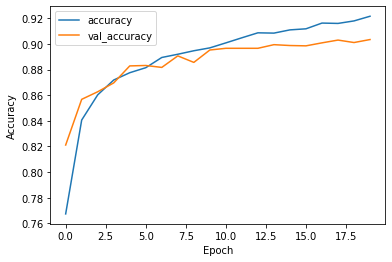

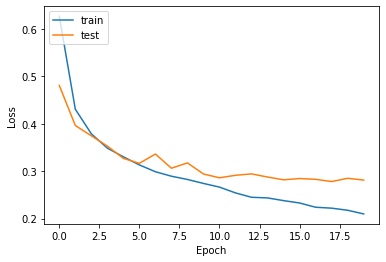

157/157 [==============================] - 1s 4ms/step - loss: 0.2797 - accuracy: 0.9051
Tested Acc: 0.9050999879837036
Tested Loss: 0.2796657085418701


In [20]:
plt.plot(train_log.history['accuracy'], label='accuracy')
plt.plot(train_log.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(train_log.history['loss'])
plt.plot(train_log.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


test_loss1, test_acc1 = model.evaluate(tf_test_data)
print("Tested Acc:", test_acc1)
print("Tested Loss:", test_loss1)


#The test accuracy is 90.4,
#There is an improvement in the test accuracy after creating a CNN model,replacing the densely connected layers, for the image classification

Building an input pipeline for data augmentation

Epoch 1/20
750/750 [==============================] - 7s 10ms/step - loss: 0.6717 - accuracy: 0.7523 - val_loss: 0.4824 - val_accuracy: 0.8230
Epoch 2/20
750/750 [==============================] - 6s 8ms/step - loss: 0.4487 - accuracy: 0.8342 - val_loss: 0.3973 - val_accuracy: 0.8544
Epoch 3/20
750/750 [==============================] - 6s 7ms/step - loss: 0.4008 - accuracy: 0.8521 - val_loss: 0.3662 - val_accuracy: 0.8642
Epoch 4/20
750/750 [==============================] - 6s 8ms/step - loss: 0.3706 - accuracy: 0.8636 - val_loss: 0.3421 - val_accuracy: 0.8733
Epoch 5/20
750/750 [==============================] - 6s 8ms/step - loss: 0.3504 - accuracy: 0.8703 - val_loss: 0.3322 - val_accuracy: 0.8770
Epoch 6/20
750/750 [==============================] - 6s 7ms/step - loss: 0.3372 - accuracy: 0.8753 - val_loss: 0.3486 - val_accuracy: 0.8729
Epoch 7/20
750/750 [==============================] - 5s 7ms/step - loss: 0.3232 - accuracy: 0.8795 - val_loss: 0.3343 - val_accuracy: 0.8785
Epoch

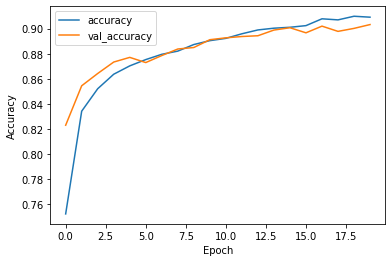

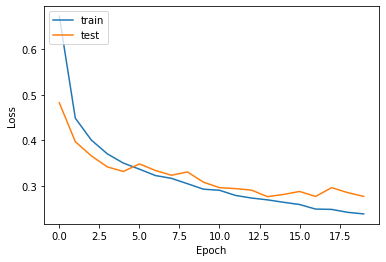

In [21]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

IMAGE_SIZE = 28
def augment(image,label):
  image = tf.image.convert_image_dtype(image, tf.float32) 
  image = tf.image.random_flip_left_right(image)
  image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
  #image = tf.image.resize_with_pad(image, IMAGE_SIZE + 6, IMAGE_SIZE + 6) # Add pixels of padding
  #image = tf.image.random_crop(image, size=[IMAGE_SIZE, IMAGE_SIZE, 1]) # Random crop back to IMAGE_SIZExIMAGE_SIZE
  return image, label

augmented_train_batches = (
    tf_train_data
    .cache()
    # The augmentation is added here.
    .map(augment, num_parallel_calls=AUTOTUNE)
    .repeat()
    .prefetch(AUTOTUNE)
)

augmented_val_batches = (
    tf_val_data
    .cache()
    # The augmentation is added here.
    .map(augment, num_parallel_calls=AUTOTUNE)
    .repeat()
    .prefetch(AUTOTUNE)
)



model = first_cnn() 



aug_history = model.fit(
      augmented_train_batches,
   steps_per_epoch=len(x_train2)/64,
      epochs=20,
      validation_data=(augmented_val_batches),
      validation_steps=750
      )

accuracy_Aug = model.evaluate(tf_test_data)
print('Accuracy is: ', accuracy_Aug[1])
print('Loss is: ', accuracy_Aug[0])

#Accuracy and validation curves

plt.plot(aug_history.history['accuracy'], label='accuracy')
plt.plot(aug_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(aug_history.history['loss'])
plt.plot(aug_history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#comparing the graphs of loss and validation for augmented and non augmented training data we can clearly say that data augmentation has reduced overfitting slightly
#Although there is no huge difference in validation accuracies at both scenarios. 

Use pretrained VGG16 convolutional base for Fashion MNIST dataset

In [23]:
#Loading the data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Split the training and test data
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=13)
X_test = test_images
y_test = test_labels


print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

#convert the images to 3 channels 
X_train = np.stack((X_train,)*3, axis=-1)
X_test = np.stack((X_test,)*3, axis=-1)
X_val = np.stack((X_val,)*3, axis=-1)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

#Resize the images into 48 x 48 as required by vgg16
X_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_train])
X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_test])
X_val = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_val])

#normalise the pixels and change the datatype to float
X_train = X_train/ 255
X_test = X_test/ 255
X_val = X_val/ 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val =X_val.astype('float32')

#assiging the reshaped image dimensions
IMG_WIDTH = 48
IMG_HEIGHT = 48
IMG_DEPTH = 3
BATCH_SIZE = 128

(48000, 28, 28)
(12000, 28, 28)
(10000, 28, 28)
(48000, 28, 28, 3)
(12000, 28, 28, 3)
(10000, 28, 28, 3)


In [24]:
conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH)
                 )
conv_base.summary()
conv_base.trainable = False

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
______________________________________________________________

In [25]:
from keras import models
from keras.models import Model
from tensorflow.keras import layers
from keras import optimizers
from keras import callbacks
from keras.layers.advanced_activations import LeakyReLU

def model_vgg():
  model= models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))
  return model

model = model_vgg()

model.summary()


model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.01),
  # optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

history = model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_val, y_val)
)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_12 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                10250     
Total params: 15,250,250
Trainable params: 535,562
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.7093 - acc: 0.7526 - v

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-q2kx8w67
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-q2kx8w67
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0b9c5fbb59463da1764fc98e57295e872dacf900d_-cp36-none-any.whl size=144138 sha256=c247adfb3b8c510349e8d4e742c3e7d52e4c4a0144ba10de2955e50fb78c6868
  Stored in directory: /tmp/pip-ephem-wheel-cache-0zho3gdr/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fa01720f8d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa0057936d8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa00579ad30> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fa00579a710> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa00445def0> False
<tensorflow.python.keras.layers

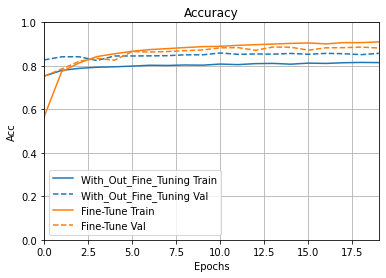

In [26]:
#fine tuning of the vgg16
!pip install git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import matplotlib.pyplot as plt

conv_base = VGG16(weights=None,
                  include_top=False, 
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH)
                 )

## Freeze the layers except the last 4 layers
for layer in conv_base.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in conv_base.layers:
    print(layer, layer.trainable)
conv_base.summary()
model1 = model_vgg()

model1.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=['acc'])

fine_tuning_history = model1.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_val, y_val)
)



plotter = tfdocs.plots.HistoryPlotter()
plotter.plot({"with_out_fine_tuning": history, "fine-tune": fine_tuning_history}, metric = "acc")
plt.title("Accuracy")
plt.ylim([0,1])
plt.show()

In [27]:
#evaluating the model Without fine tuning
test_acc = model.evaluate(X_test,y_test)
print('test accuracy achieved is: ',test_acc[1])

#with fine tuning 
test_acc = model1.evaluate(X_test,y_test)
print('test accuracy achieved is: ',test_acc[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.4751 - acc: 0.8505
test accuracy achieved is:  0.8504999876022339
313/313 [==============================] - 4s 12ms/step - loss: 0.3407 - acc: 0.8760
test accuracy achieved is:  0.8759999871253967
